실습과제: 본인이 자유롭게 선정한 데이터셋으로 머신러닝 코드 작성하기

- 지도학습: K최근접이웃, 선형회귀, 로지스틱회귀, 결정트리
 - 분류: 얘가 어떤 카테고리인지 맞혀봐
 - 회귀: 얘가 어떤 값일지 맞혀봐
- 비지도학습: K평균, PCA(차원축소)
 - 분류: 얘가 어떤 카테고리일지 니가 알아서 나눠봐

우리가 공부했던 위 내용들 중 코드를 짜보고 싶은 주제가 하나 정도는 있을 것이다. 골라서 진행하자

중요! 데이터셋은 뭘로? 캐글을 참고!
ex) 분류 == classification 데이터셋 검색

캐글에서 자신이 선정한 주제에 맞는 데이터셋을 자유롭게 골라보자

3교시까지 개별진행 후 4교시쯤에는 조별로 이야기를 나누어서 누가 발표를 할지 선정한다.

# CHD: 관상동맥질환 데이터를 이용한 로지스틱 회귀

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression

In [134]:
CHD = pd.read_csv("CHD.csv")

In [3]:
CHD_df = pd.DataFrame(CHD)

CHD_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
CHD_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
CHD_df['education'] = CHD_df['education'].fillna(CHD_df['education'].median())
CHD_df['cigsPerDay'] = CHD_df['cigsPerDay'].fillna(CHD_df['cigsPerDay'].median())
CHD_df['BPMeds'] = CHD_df['BPMeds'].fillna(CHD_df['BPMeds'].median())
CHD_df['totChol'] = CHD_df['totChol'].fillna(CHD_df['totChol'].median())
CHD_df['BMI'] = CHD_df['BMI'].fillna(CHD_df['BMI'].median())
CHD_df['heartRate'] = CHD_df['heartRate'].fillna(CHD_df['heartRate'].median())
CHD_df['glucose'] = CHD_df['glucose'].fillna(CHD_df['glucose'].median())

CHD_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
CHD_df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017205,0.197596,0.315630,-0.051545,-0.004546,0.005313,0.015708,-0.069549,-0.035989,0.057933,0.081653,-0.116621,0.010073,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.101258,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.007618,-0.010365,-0.035150,-0.081021,-0.038136,-0.022364,-0.128273,-0.061719,-0.135501,-0.053683,-0.033982,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.044295,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.007618,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.036150,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863,0.058859
BPMeds,-0.051545,0.120955,-0.010365,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.051394,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124,0.086417
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.006949,0.000123,0.057009,0.045190,0.024265,-0.017674,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.077808,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036150,0.051394,0.006949,0.077808,1.000000,0.040117,0.111283,0.050329,0.086025,0.048996,0.606493,0.097317
totChol,-0.069549,0.260105,-0.022364,-0.046466,-0.026976,0.078578,0.000123,0.163054,0.040117,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559,0.081566


In [13]:
CHD_data = CHD_df.iloc[:, 0:15]
CHD_target = CHD_df['TenYearCHD']

print(CHD_data)
print(CHD_target)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [17]:
print(CHD_data.shape)
print(CHD_target.shape)

(4238, 15)
(4238,)


In [18]:
ss = StandardScaler()
CHD_scaled = ss.fit_transform(CHD_data)

print(CHD_scaled)
print(CHD_scaled.shape)

[[ 1.1531919  -1.23495068  2.00655919 ...  0.28737925  0.34276147
  -0.2013593 ]
 [-0.86715836 -0.41825733  0.02038662 ...  0.7197521   1.59029076
  -0.24509896]
 [ 1.1531919  -0.18491638 -0.97269966 ... -0.11305697 -0.07308163
  -0.5075369 ]
 ...
 [-0.86715836 -0.18491638  0.02038662 ... -0.93358273  0.67543595
   0.19229761]
 [-0.86715836 -0.65159829 -0.97269966 ... -1.63127529  0.84177318
  -0.15761964]
 [-0.86715836  0.28176554  0.02038662 ... -1.06378592  0.34276147
   1.11083042]]
(4238, 15)


In [23]:
train_input, test_input, train_target, test_target = train_test_split(
    CHD_scaled, CHD_target, test_size=0.3, random_state=23
)
print(train_input.shape, test_input.shape)

(2966, 15) (1272, 15)


In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=15, activation='sigmoid'))

callback = EarlyStopping(monitor='loss', patience=8) ## epochs 조기종료

model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(train_input, train_target, epochs=500,
    callbacks=[callback])

Epoch 1/500
93/93 [==============================] - 2s 8ms/step - loss: 0.7209
Epoch 2/500
93/93 [==============================] - 1s 7ms/step - loss: 0.6160
Epoch 3/500
93/93 [==============================] - 1s 7ms/step - loss: 0.5464
Epoch 4/500
93/93 [==============================] - 0s 4ms/step - loss: 0.4997
Epoch 5/500
93/93 [==============================] - 0s 3ms/step - loss: 0.4680
Epoch 6/500
93/93 [==============================] - 0s 3ms/step - loss: 0.4461
Epoch 7/500
93/93 [==============================] - 0s 5ms/step - loss: 0.4306
Epoch 8/500
93/93 [==============================] - 1s 6ms/step - loss: 0.4194
Epoch 9/500
93/93 [==============================] - 0s 3ms/step - loss: 0.4113
Epoch 10/500
93/93 [==============================] - 0s 4ms/step - loss: 0.4052
Epoch 11/500
93/93 [==============================] - 0s 4ms/step - loss: 0.4006
Epoch 12/500
93/93 [==============================] - 0s 4ms/step - loss: 0.3970
Epoch 13/500
93/93 [=================

In [41]:
pred = model.predict(test_input)
accuracy_score(test_target, np.round(pred))

40/40 [==============================] - 0s 3ms/step


0.8537735849056604

결과가 0.7로 10년 후 관상동맥심질환에 걸릴 확률이 높다

In [37]:
model.predict([[1.1531919, -1.23495068, 2.00655919, -3.245678, 4.5678912, -5.7891234, 6.9012345, -7.1234567, 8.2345678, -9.3456789, 10.456789, -11.5678901, 12.6789012, -13.7890123, 14.8901234]])

1/1 [==============================] - 0s 137ms/step


array([[0.79509956]], dtype=float32)

## 시각화

## 종속변수와 독립변수간의 상관관계

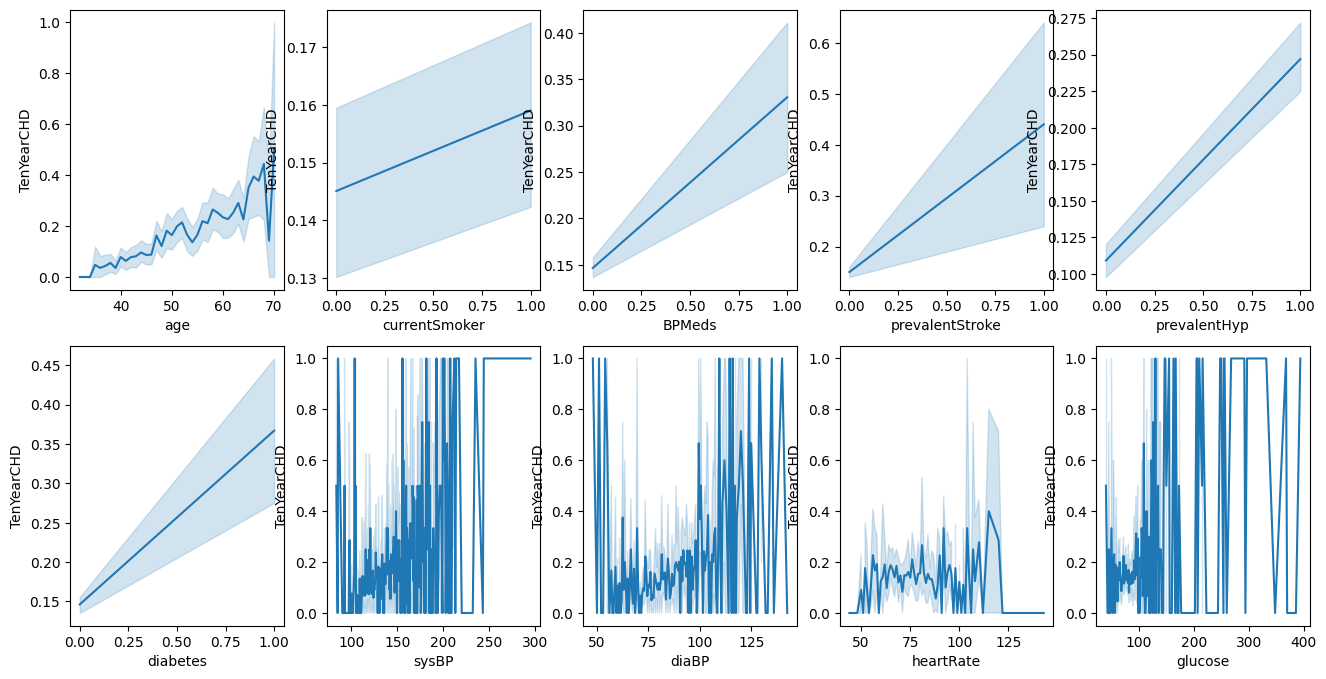

In [156]:
# currentSmoker: 현재흡연자, BPMeds: 혈압약 복용여부, prevalentstroke: 뇌졸중
# prevalentHyp: 고혈압 여부, diabetes: 당뇨여부
# sysBP: 수축기 혈압, DiaBP: 확장기 혈압, heartRate: 심박수, glucose: 혈당 수준

fig, axs = plt.subplots(figsize=(16,8) , ncols=5 , nrows=2)
lm_features = ['age', 'currentSmoker', 'BPMeds', 'prevalentStroke',
               'prevalentHyp', 'diabetes','sysBP', 'diaBP', 'heartRate', 'glucose']

for i , feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    sns.lineplot(x=feature , y='TenYearCHD',data=CHD_df, ax=axs[row][col])

plt.show()